# **Stochastic Inventory Models**

## **Newsvendor Problem**

---

The newsvendor (newsboy) model is a mathematical model in operations management and applied economics used to determine optimal inventory levels. It is (typically) characterized by fixed prices and *uncertain demand* for a *perishable product*.

In [ ]:
pip install google.colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm as normSci
import numpy as np
import pandas as pd
from google.colab import files
import io
from pylab import *
import math


Symbol       | Description                                    
--- | :---:
r      | Revenue of one product                     
c      | Cost of one product                       
w      | Salvage value of one product

In [ ]:
r = 1.00
c = 0.60
w = 0.25

scenarios = [['Low Demand',75,.25],['High Demand',200,.75]]

### **Cost Function**

\begin{equation}
C_o\sum_{0\leq k \leq Q} p_k(Q -k) +  C_u\sum_{k \geq Q} p_k(k-Q)
\end{equation}

Text(0, 0.5, 'Expected Cost')

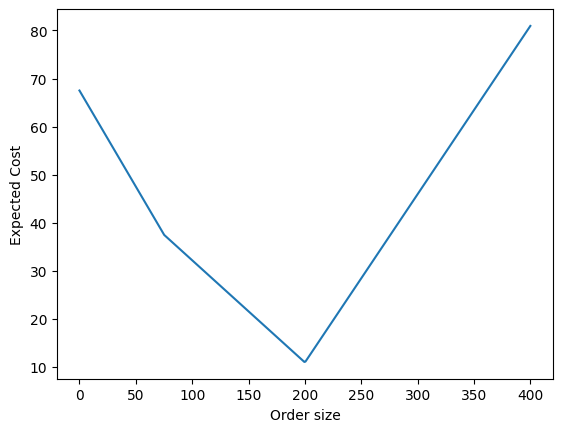

In [ ]:
def cost(D,Q):
    return (r-c)*max(D-Q,0) + (c-w)*max(Q-D,0)

def excost(Q):
    v = 0
    for s in scenarios:
        v += s[2]*cost(s[1],Q)
    return v

Q = np.linspace(0,400,400)
plt.plot(Q,[excost(q) for q in Q])
plt.xlabel('Order size')
plt.ylabel('Expected Cost')

### **Data**

In [ ]:
# Colab
uploaded = files.upload()

Saving data_lab3_1.csv to data_lab3_1.csv


In [ ]:
df_1 = pd.read_csv(io.BytesIO(uploaded['data_lab3_1.csv']))
df_1.head()

,Demand
0,148.0
1,196.0
2,78.0
3,195.0
4,254.0


#### TO DO

In [ ]:
mu = df_1.mean()[0]
sigma = df_1.std()[0]
Supply = {'Price': 10.0, 'Cost': 6.0, 'SalvageCost': 2.0}
r = Supply['Price']
c = Supply['Cost']
w = Supply['SalvageCost']
K = 30
alpha = 0.98
h = 3.75

L = 3

print(mu,sigma)

174.979 100.92513285322661


<ipython-input-15-2777ca9adaa6>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = df_1.mean()[0]
<ipython-input-15-2777ca9adaa6>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = df_1.std()[0]


### **Solution** To Do

\begin{equation}
F(Q^⋆) = \frac{C_u}{C_u + C_o}
\end{equation}

In [ ]:
Q = int(math.sqrt((2*K* mu)/h))
print(Q)

52


-122.979


Text(0, 0.5, 'inventory level')

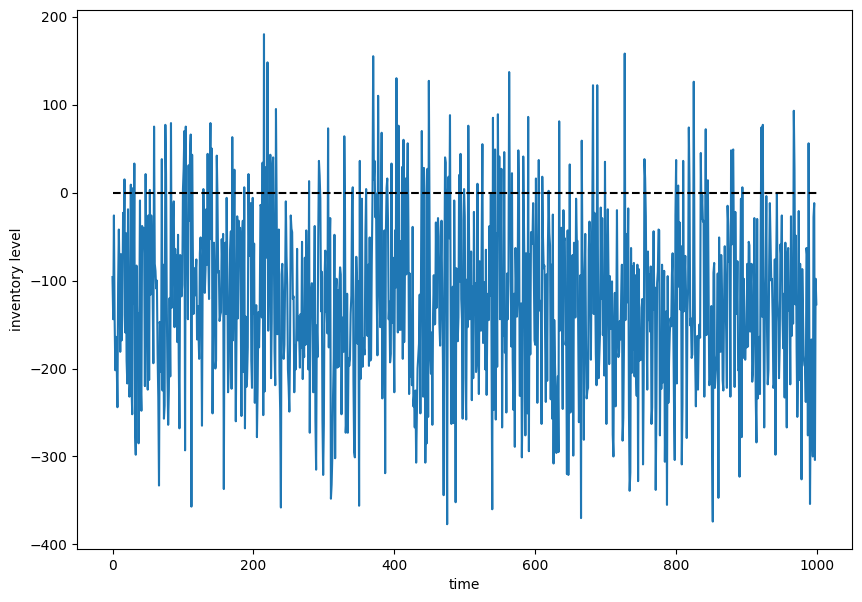

In [ ]:
Q_ = Q-df_1['Demand']
print(Q_.mean())
figure(figsize =(10, 7))
plot(Q_)
hlines(0,0,1000,linestyles ='dashed',color='k')

plt.xlabel('time')
plt.ylabel('inventory level')

# **Base Stock Policy**

## **Continuous Reveiw**

---

The reorder point (ROP) is the level of inventory which triggers an action to replenish that particular inventory stock. It is a minimum amount of an item which a firm holds in stock, such that, when stock falls to this amount, the item must be reordered. It is normally calculated as the forecast usage during the replenishment lead time plus safety stock.

In [ ]:
# Colab
uploaded = files.upload()

Saving data_lab3_2.csv to data_lab3_2.csv


In [ ]:
df_2 = pd.read_csv(io.BytesIO(uploaded['data_lab3_2.csv']))
df_2.head()

,Demand
0,125
1,364
2,0
3,24
4,400


Symbole | Description
--- | ---
Q  | Ordering quantity
R  | Reordering point
K  | Cost to place an order
h | Cost of holding an item for one year
$\mu$ | Annual Demand
$\sigma$ | standard deviation of demand
L | Lead Time
$α$ | Service Level

In [ ]:
K = 20
# mu = 200  # per day
# sigma = 150 # per day
mu = round(df_2['Demand'].mean())  #df_2.mean()[0]
sigma = round(df_2['Demand'].std())
p = .20 # of cost, inventory's monetary value per year
L = 4 # days
alpha = .95
cost = 10 # item cost
working_weeks = 50 # per year
working_days = 5 # per week

print(mu, sigma)

197 150


### **Optimum (R,Q)** To Do

In [ ]:
def Continuous_Review_Q(K,mu,h):
    Q = math.sqrt((2*K* mu)/h)
    return Q

def Continuous_Review_R(Q_,mu,sigma,L,alpha):
    R = mu*L + sigma* math.sqrt(L) * normSci.ppf(alpha)
    return R


h = p * cost
mu_annual = mu * working_days * working_weeks
Qstar = Continuous_Review_Q(K,mu_annual,h)

Rstar = Continuous_Review_R(Qstar,mu,sigma,L,alpha)

print(round(Qstar))
print(round(Rstar))

992
1281


,Demand,Date,Reorder_Point,Order_Quantity,Lead_Time,On_hand_inventory,On_order_inventory,Inventory_position
0,125,1,1281,992,4,1275,992,2267
1,364,2,1281,992,4,911,992,1903
2,0,3,1281,992,4,911,992,1903
3,24,4,1281,992,4,1879,992,2871
4,400,5,1281,992,4,2471,0,2471
...,...,...,...,...,...,...,...,...
355,155,356,1281,992,4,1237,992,2229
356,0,357,1281,992,4,1237,992,2229
357,0,358,1281,992,4,1237,992,2229
358,0,359,1281,992,4,2229,992,3221


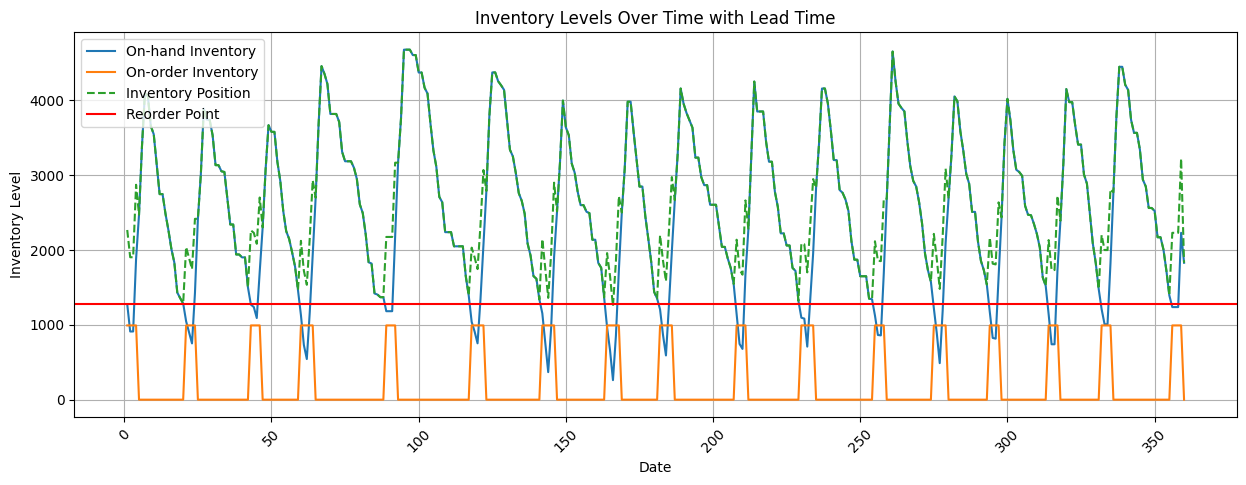

In [ ]:
data = {
    "Demand": df_2['Demand'],  # Daily demand
    "Date": range(1,1+len(df_2['Demand'])),  # Time period
    "Reorder_Point": round(Rstar),  # Inventory level at which we order
    "Order_Quantity": round(Qstar),  # Fixed order quantity
    "Lead_Time": L  # Number of days before the order arrives
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set Initial Inventory Level
initial_inventory = 1400
On_hand_inventory = [initial_inventory]
On_order_inventory = []  # List to track pending orders (date they will arrive)
On_order_inventory_date = []

# Simulate Inventory Over Time
for i in range(len(df)):
    # Receive inventory if orders were placed "Lead_Time" days ago
    if On_order_inventory_date and On_order_inventory_date[0][0] == df.loc[i, "Date"]:
        On_hand_inventory[-1] += On_order_inventory_date.pop(0)[1]  # Add order quantity

    # Compute new inventory level after demand is met
    new_inventory = On_hand_inventory[-1] - df.loc[i, "Demand"]
    On_order_inventory.append(0)

    # If inventory falls below reorder point, place an order
    if new_inventory <= data["Reorder_Point"]:
        On_order_inventory_date.append((df.loc[i, "Date"] + data["Lead_Time"], data["Order_Quantity"]))
        On_order_inventory[-1] = data["Order_Quantity"]

    # Append new inventory level
    On_hand_inventory.append(new_inventory)

# Remove the first initial inventory (optional)
On_hand_inventory = On_hand_inventory[1:]

# Add computed inventory levels to DataFrame
df["On_hand_inventory"] = On_hand_inventory
df["On_order_inventory"] = On_order_inventory
df["Inventory_position"] =  [a + b for a, b in zip(On_order_inventory, On_hand_inventory)]

# Display table
display(df)

# Plot Inventory Levels Over Time
plt.figure(figsize=(15, 5))

plt.plot(df["Date"], df["On_hand_inventory"], label="On-hand Inventory")
plt.plot(df["Date"], df['On_order_inventory'], label="On-order Inventory")
plt.plot(df["Date"], df['Inventory_position'], linestyle="--", label="Inventory Position")
plt.axhline(y=data["Reorder_Point"], color='r', label="Reorder Point")  # Mark reorder point

plt.xlabel("Date")
plt.ylabel("Inventory Level")
plt.title("Inventory Levels Over Time with Lead Time")

plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


### **relation between $\alpha$ and reordering point**

Text(0, 0.5, 'Reordering Point')

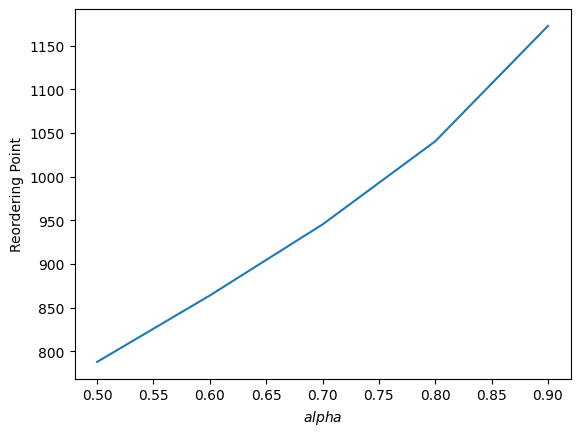

In [ ]:
alpha_ = np.arange(0.5, 1., 0.1)
plot(alpha_,Continuous_Review_R(Qstar,mu,sigma,L,alpha_))
plt.xlabel('$alpha$')
plt.ylabel('Reordering Point')

## **Periodic Review**


---

With the periodic review system, you determine the quantity of an item your company has on hand at specified, fixed-time intervals (such as every Friday or the last day of every month). You place an order for an amount (Q) equal to the target inventory level (TI), minus the quantity on hand (OH), similar to the min-max system.

The difference is that with the periodic review system, the time between orders is constant (such as every hour, every day, every week, or every month) with varying quantities ordered. The min-max system varies both the time between orders and the quantities ordered.An advantage of the periodic review system is that inventory is counted only at specific time intervals. You do not need to monitor the inventory level between review periods.

### **Optimum (S,T)** To Do

In [ ]:
def Periodic_Review_Cycle_T(K,mu,h):
  Cycle_time = math.sqrt((2*K) / (mu * h))
  return Cycle_time

def Periodic_Review_S(Cycle_time,mu,sigma,L,alpha):
    S = mu*(Cycle_time + L) + sigma* math.sqrt(L + Cycle_time) * normSci.ppf(alpha)
    return S

h = p * cost
mu_annual = mu * working_days * working_weeks

Cycle_time = Periodic_Review_Cycle_T(K,mu_annual,h)

Cycle_time_in_days = Cycle_time * working_weeks * working_days
InventoryLimit = Periodic_Review_S(Cycle_time_in_days,mu,sigma,L,alpha)

print(round(Cycle_time,2))
print(round(Cycle_time_in_days))
print(round(InventoryLimit))

0.02
5
2522


,Demand,Date,Review_Period,Max_Inventory_Level,Lead_Time,On_hand_inventory,On_order_inventory,Inventory_position
0,125,1,5,2522,4,1275,0,1275
1,364,2,5,2522,4,911,0,911
2,0,3,5,2522,4,911,0,911
3,24,4,5,2522,4,887,0,887
4,400,5,5,2522,4,487,2035,2522
...,...,...,...,...,...,...,...,...
355,155,356,5,2522,4,1237,0,1237
356,0,357,5,2522,4,1237,0,1237
357,0,358,5,2522,4,2367,0,2367
358,0,359,5,2522,4,2367,0,2367


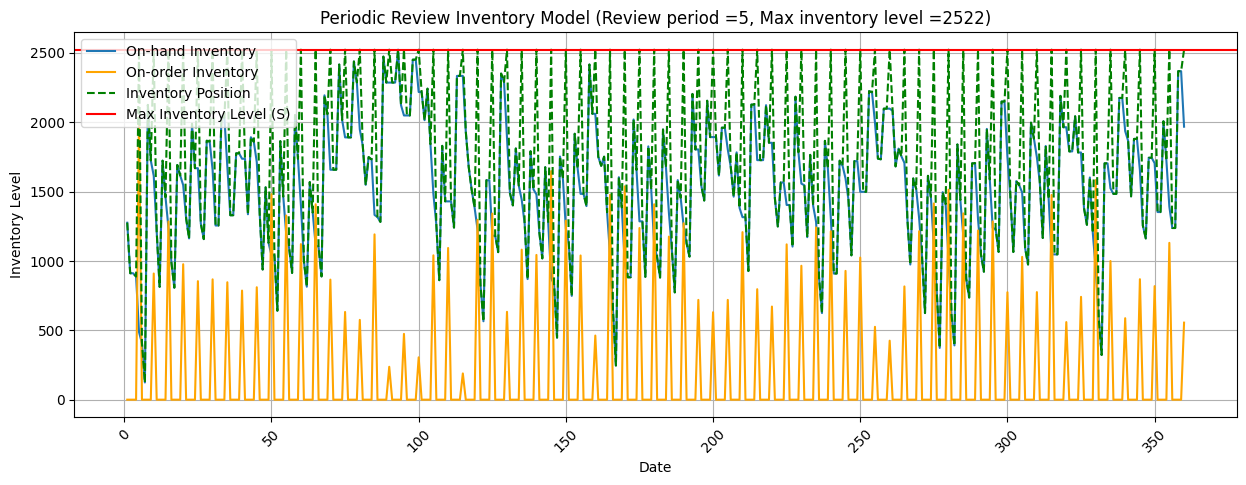

In [ ]:
data = {
    "Demand": df_2['Demand'],  # Daily demand
    "Date": range(1, 1 + len(df_2['Demand'])),  # Time period
    "Review_Period": round(Cycle_time_in_days),  # Period in which inventory is reviewed
    "Max_Inventory_Level": round(InventoryLimit),  # Maximum stock level
    "Lead_Time": L  # Number of days before order arrives
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set Initial Inventory Level
initial_inventory = 1400
On_hand_inventory = [initial_inventory]
On_order_inventory = []  # Track orders placed
On_order_inventory_date = []  # Track when orders will arrive

# Simulate Inventory Over Time
for i in range(len(df)):
    current_date = df.loc[i, "Date"]

    # Receive inventory if orders were placed "Lead_Time" days ago
    while On_order_inventory_date and On_order_inventory_date[0][0] == current_date:
        On_hand_inventory[-1] += On_order_inventory_date.pop(0)[1]  # Add arriving order

    # Compute new inventory level after demand is subtracted
    new_inventory = On_hand_inventory[-1] - df.loc[i, "Demand"]
    On_order_inventory.append(0)  # Default 0 unless an order is placed

    # Check if it's time to review inventory (every T days)
    if current_date % data['Review_Period'] == 0:
        order_quantity = max(0, data['Max_Inventory_Level'] - new_inventory)  # Order up to max level S

        if order_quantity > 0:
            On_order_inventory_date.append((current_date + L, order_quantity))  # Order arrives in lead time
            On_order_inventory[-1] = order_quantity  # Track amount ordered

    # Append new inventory level
    On_hand_inventory.append(new_inventory)

# Remove the first initial inventory (optional)
On_hand_inventory = On_hand_inventory[1:]

# Add computed inventory levels to DataFrame
df["On_hand_inventory"] = On_hand_inventory
df["On_order_inventory"] = On_order_inventory
df["Inventory_position"] = [a + b for a, b in zip(On_order_inventory, On_hand_inventory)]

# Display table
display(df)

# Plot Inventory Levels Over Time
plt.figure(figsize=(15, 5))

plt.plot(df["Date"], df["On_hand_inventory"], label="On-hand Inventory")
plt.plot(df["Date"], df['On_order_inventory'], label="On-order Inventory", color="orange")
plt.plot(df["Date"], df['Inventory_position'], linestyle="--", label="Inventory Position", color="green")
plt.axhline(y = data['Max_Inventory_Level'], color='r', label="Max Inventory Level (S)")  # Mark max inventory level

plt.xlabel("Date")
plt.ylabel("Inventory Level")
plt.title("Periodic Review Inventory Model (Review period ={}, Max inventory level ={})".format(data['Review_Period'], data['Max_Inventory_Level']))

plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

### **relation between $\alpha$ and $S$**

In [ ]:
...

### **relation between $T$ and $S$**

In [ ]:
...